loss: 0.244701, 0.067820 sec per epoch 


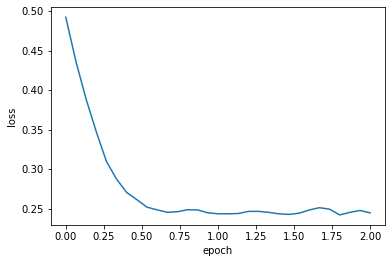

In [2]:
import torch
import d2lzh as d2l

features,labels = d2l.get_data_ch7()

def init_adam_states():
    v_w = torch.zeros((features.shape[1],1),dtype=torch.float32)
    v_b = torch.zeros(1,dtype=torch.float32)

    s_w = torch.zeros((features.shape[1],1),dtype=torch.float32)
    s_b = torch.zeros(1,dtype=torch.float32)

    return ((v_w,s_w),(v_b,s_b))

def adam(params,states,hyperparams):
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-6

    for p,(v,s) in zip(params,states):
        v[:] = beta1 * v + (1-beta1) * p.grad.data 
        s[:] = beta2 * s + (1-beta2) * p.grad.data ** 2

        v_bias_corr = v / (1 - beta1 ** hyperparams["t"])
        s_bias_corr = s / (1 - beta2 ** hyperparams["t"])
        p.data -= hyperparams["lr"] * v_bias_corr / (torch.sqrt(s_bias_corr)+eps)
    hyperparams["t"] += 1

d2l.train_ch7(adam,init_adam_states(),{"lr":0.01,"t":1},features,labels)

loss: 0.242951, 0.054854 sec per epoch 


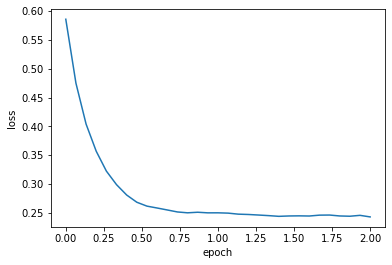

In [3]:
d2l.train_pytorch_ch7(torch.optim.Adam,{"lr":0.01},features,labels)